<a href="https://colab.research.google.com/github/MathildaFlorenstikaSofiana/Pemprograman-Python/blob/main/Tugas_11_Python_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [138]:
ls

dataset/  Untitled0.ipynb  Untitled1.ipynb


In [139]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [140]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [141]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 240x240 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [142]:
print(labels)

['nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB',

In [143]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [144]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [145]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(425, 240, 240, 3)
(142, 240, 240, 3)


In [164]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 25088)           

In [165]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(240*240*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [166]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 172800)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               17280100  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 17,282,039
Trainable params: 17,282,039
Non-trainable params: 0
_________________________________________________________________


In [167]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [168]:
H = model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=25,batch_size=32)

Epoch 1/25
14/14 [==============================] - 13s 929ms/step - loss: 1.5655 - accuracy: 0.2988 - val_loss: 1.3804 - val_accuracy: 0.3803
Epoch 2/25
14/14 [==============================] - 13s 910ms/step - loss: 1.1723 - accuracy: 0.5388 - val_loss: 1.2018 - val_accuracy: 0.4930
Epoch 3/25
14/14 [==============================] - 13s 917ms/step - loss: 0.9364 - accuracy: 0.6212 - val_loss: 0.9150 - val_accuracy: 0.7113
Epoch 4/25
14/14 [==============================] - 13s 914ms/step - loss: 0.6977 - accuracy: 0.7459 - val_loss: 0.8682 - val_accuracy: 0.6338
Epoch 5/25
14/14 [==============================] - 13s 911ms/step - loss: 0.5362 - accuracy: 0.8212 - val_loss: 0.7979 - val_accuracy: 0.6831
Epoch 6/25
14/14 [==============================] - 13s 913ms/step - loss: 0.4059 - accuracy: 0.8541 - val_loss: 0.6843 - val_accuracy: 0.7394
Epoch 7/25
14/14 [==============================] - 13s 916ms/step - loss: 0.3503 - accuracy: 0.8612 - val_loss: 0.6995 - val_accuracy: 0.7254

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


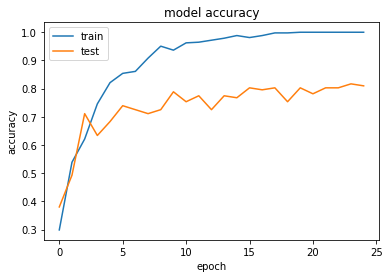

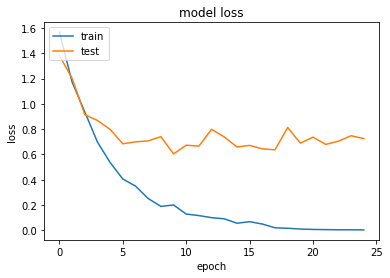

In [169]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [170]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))


[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.85      0.74      0.79        31
      GMB_02       0.72      0.88      0.79        32
      GMB_03       0.90      0.78      0.84        23
      GMB_04       0.78      0.85      0.81        33
      nonGMB       0.90      0.78      0.84        23

    accuracy                           0.81       142
   macro avg       0.83      0.81      0.81       142
weighted avg       0.82      0.81      0.81       142



In [173]:
model.save('nnmodel_daun')

INFO:tensorflow:Assets written to: nnmodel_daun/assets
